In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import logging

import scipy.stats
import numpy as np

In [2]:
import diffxpy.api as de

In [3]:
logging.getLogger("tensorflow").setLevel(logging.ERROR)
logging.getLogger("batchglm").setLevel(logging.INFO)
logging.getLogger("diffxpy").setLevel(logging.INFO)

# Generate some data:

In [4]:
from batchglm.api.models.glm_nb import Simulator

sim = Simulator(num_observations=2000, num_features=100)
sim.generate_sample_description(num_batches=0, num_conditions=4)
sim.generate_params()
sim.generate_data()

# Test entire factor

In [5]:
test_fac = de.test.wald(
    data=sim.X,
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    sample_description=sim.sample_description,
    batch_size=100,
    training_strategy="DEFAULT",
    dtype="float64"
)

INFO:diffxpy.testing.base:Fitting model...


/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


In [6]:
test_fac.summary().iloc[:10,:]

,gene,pval,qval,log2fc,mean,grad,ll
0,0,0.000000e+00,0.000000e+00,-0.623362,524.3465,-5.732372,-13986.912173
1,1,0.000000e+00,0.000000e+00,0.554517,722.0995,0.017031,-15094.933032
2,2,0.000000e+00,0.000000e+00,-0.565846,464.9435,-0.000554,-14196.188188
3,3,4.263256e-14,4.790176e-14,0.320814,533.4245,-0.150438,-14494.286294
4,4,0.000000e+00,0.000000e+00,0.641644,713.3575,-1.812485,-14716.925688
5,5,0.000000e+00,0.000000e+00,-0.642559,509.8435,-0.021054,-14347.927228
6,6,0.000000e+00,0.000000e+00,0.576617,604.3960,-0.441091,-14484.849257
7,7,1.110223e-16,1.290957e-16,0.670479,736.6925,0.000001,-14953.683403
8,8,0.000000e+00,0.000000e+00,0.668070,622.3150,-0.213065,-14727.123289
9,9,0.000000e+00,0.000000e+00,0.463372,524.6420,-0.018565,-14424.225948


In [7]:
test_fac.theta_sd.shape

(100, 5)

The volcano plot looks a bit weird because only the maximal coefficient is shown, the pvalue comes from a test which is base on the full set of coefficients though.

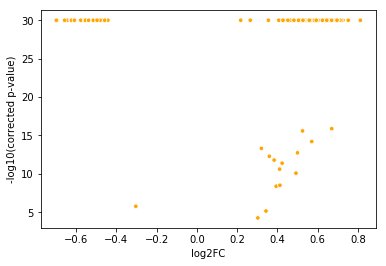

In [8]:
test_fac.plot_volcano()

# Test specific coefficients

Check coefficient names in model by pre-genereating design matrix from sample description (the corresponding function is provided through diffxpy and provides the same design matrix as is later used within the test):

In [9]:
de.test.coef_names(
    data=sim.X, 
    sample_description=sim.sample_description, 
    formula="~ 1 + condition"
)

['Intercept', 'condition[T.1]', 'condition[T.2]', 'condition[T.3]']

Run test on all coefficients related to condition (i.e. all three condition effects, the fourth one is absorbed into the intercept):

In [11]:
test_coef = de.test.wald(
    data=sim.X,
    formula_loc="~ 1 + condition",
    coef_to_test=['condition[T.1]', 'condition[T.2]', 'condition[T.3]'],
    sample_description=sim.sample_description,
    batch_size=100,
    training_strategy="DEFAULT",
    dtype="float64"
)

INFO:diffxpy.testing.base:Fitting model...


/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


In [12]:
test_coef.summary().iloc[:10,:]

,gene,pval,qval,log2fc,mean,grad,ll
0,0,0.000000e+00,0.000000e+00,-0.623362,524.3465,-5.732372,-13986.912173
1,1,0.000000e+00,0.000000e+00,0.554517,722.0995,0.017031,-15094.933032
2,2,0.000000e+00,0.000000e+00,-0.565846,464.9435,-0.000554,-14196.188188
3,3,4.263256e-14,4.790176e-14,0.320814,533.4245,-0.150438,-14494.286294
4,4,0.000000e+00,0.000000e+00,0.641644,713.3575,-1.812485,-14716.925688
5,5,0.000000e+00,0.000000e+00,-0.642559,509.8435,-0.021054,-14347.927228
6,6,0.000000e+00,0.000000e+00,0.576617,604.3960,-0.441091,-14484.849257
7,7,1.110223e-16,1.290957e-16,0.670479,736.6925,0.000001,-14953.683403
8,8,0.000000e+00,0.000000e+00,0.668070,622.3150,-0.213065,-14727.123289
9,9,0.000000e+00,0.000000e+00,0.463372,524.6420,-0.018565,-14424.225948


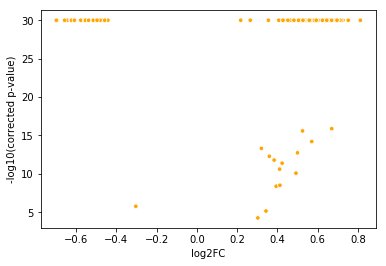

In [13]:
test_coef.plot_volcano()

# Compare results

The factor and coefficient wise test should be the same, they are two input options to phrase the exact same test.

In [14]:
test_fac_pval = np.log(test_fac.pval)
test_fac_pval[test_fac_pval < -30] = -30
test_coef_pval = np.log(test_coef.pval)
test_coef_pval[test_coef_pval < -30] = -30
sns.scatterplot(test_fac_pval, test_coef_pval)

/Users/david.fischer/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
